In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/Students.csv')
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [73]:
# вставка новой колонки, все значения которой равны 1. Нужно для вычисления количества элементов при группировке
count = np.full(len(df), 1)
df.insert(len(df.columns), 'count', count)

## Количество завершивших курс

C:\Users\Артем\AppData\Local\Temp\ipykernel_11156\3482095773.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', ncols=2)


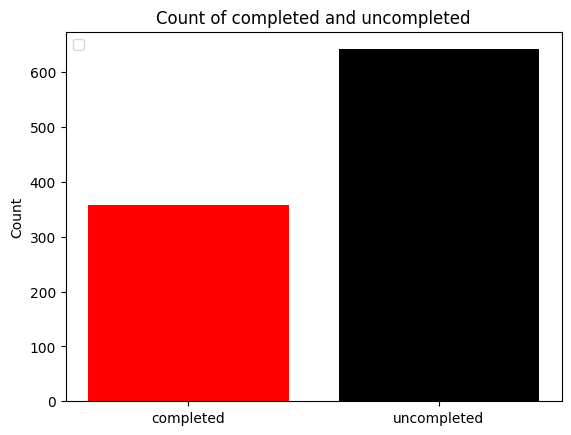

In [27]:
# количество студентов, прошедших курс
completed = sum(df['test_preparation_course'] == 'completed')

# количество студентов, не прошедших курс
uncompleted = len(df) - completed

# визуализация
values = ['completed', 'uncompleted']
counts = [completed, uncompleted]
colors=['red', 'black']
fig, ax = plt.subplots()
ax.bar(values, counts, color=colors)
ax.set_ylabel('Count')
ax.set_title('Count of completed and uncompleted')
plt.show()

## Процент завершивших курс по каждой научной степени

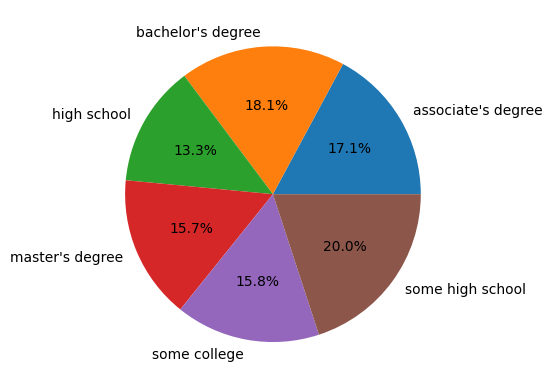

In [62]:
# подсчёт общего количества людей по каждой научной степени
degrees = df[['new_col', 'parental_level_of_education']]
counts = degrees.groupby('parental_level_of_education').count()

associate = counts.loc["associate's degree", "new_col"]
bachelour = counts.loc["bachelor's degree", "new_col"]
high_school = counts.loc["high school", "new_col"]
master = counts.loc["master's degree", "new_col"]
college = counts.loc["some college", "new_col"]
some_high_school = counts.loc["some high school", "new_col"]


# подсчёт количества сдавших людей по каждой научной степени
completed = df[df['test_preparation_course'] == 'completed']
counts_complete = completed[['new_col', 'parental_level_of_education']].groupby('parental_level_of_education').count()

associate_complete = counts_complete.loc["associate's degree", "new_col"]
bachelour_complete = counts_complete.loc["bachelor's degree", "new_col"]
high_school_complete = counts_complete.loc["high school", "new_col"]
master_copmlete = counts_complete.loc["master's degree", "new_col"]
college_complete = counts_complete.loc["some college", "new_col"]
some_high_school_complete = counts_complete.loc["some high school", "new_col"]

# вычисления процентов сдавших по каждой научной степени
percents = [
    (associate_complete/associate)*100,
    (bachelour_complete/bachelour)*100,
    (high_school_complete/high_school)*100,
    (master_copmlete/master)*100,
    (college_complete/college)*100,
    (some_high_school_complete/some_high_school)*100
]

# визуализация результатов 
labels = np.unique(df['parental_level_of_education'])
fig, ax = plt.subplots()
ax.pie(percents, labels=labels, autopct='%1.1f%%')
plt.show()

## Средний балл по математике для каждой научной степени

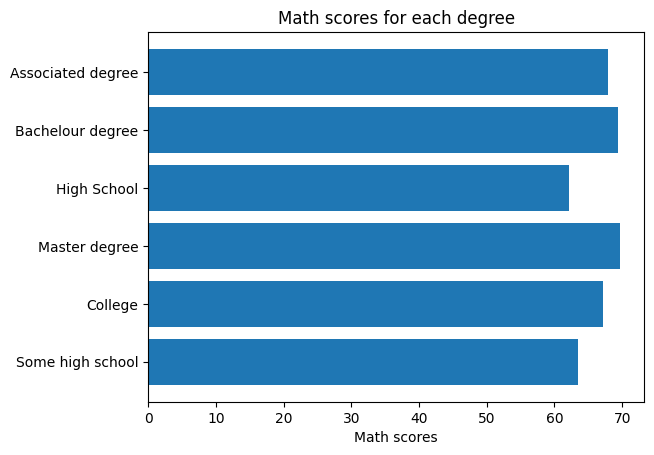

In [63]:
#вычисление среднего балла по математике для каждой научной степени
math_scores_mean = df[['parental_level_of_education', 'math_score']].groupby('parental_level_of_education').mean()

scores = pd.Series(
    {
        'Associated degree': math_scores_mean.loc["associate's degree", "math_score"],
        'Bachelour degree': math_scores_mean.loc["bachelor's degree", "math_score"],
        'High School': math_scores_mean.loc["high school", "math_score"],
        'Master degree': math_scores_mean.loc["master's degree", "math_score"],
        'College': math_scores_mean.loc["some college", "math_score"],
        'Some high school': math_scores_mean.loc["some high school", "math_score"]
    }
)

# визуализаия
indexes = scores.index
y = np.arange(len(indexes))
math_scores = scores.values

fig, ax = plt.subplots()
ax.barh(y, math_scores)
ax.set_yticks(y, indexes)
ax.invert_yaxis()
ax.set_xlabel('Math scores')
ax.set_title('Math scores for each degree')
plt.show()

## Вычисление среднего балла по каждому предмету для каждой научной степени

C:\Users\Артем\AppData\Local\Temp\ipykernel_11156\582213125.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'male': list(map(float, (math.loc['male'], writing.loc['male'], reading.loc['male']))),
C:\Users\Артем\AppData\Local\Temp\ipykernel_11156\582213125.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'female': list(map(float, (math.loc['female'], writing.loc['female'], reading.loc['female'])))


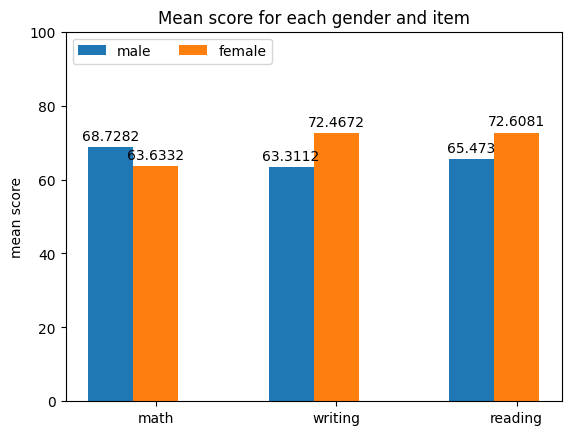

In [66]:
# вычисление среднего балла по математике по каждому полу
math = df[['gender', 'math_score']].groupby('gender').mean()

# вычисление среднего балла по письму по каждому полу
writing = df[['gender', 'writing_score']].groupby('gender').mean()

# вычисление среднего балла по чтению по каждому полу 
reading = df[['gender', 'reading_score']].groupby('gender').mean()

items = ['math', 'writing', 'reading']
values = {
    'male': list(map(float, (math.loc['male'], writing.loc['male'], reading.loc['male']))),
    'female': list(map(float, (math.loc['female'], writing.loc['female'], reading.loc['female'])))
}

# визулаизация
x = np.arange(len(items))
width = 0.25
multiplier = 0

fig, ax = plt.subplots()
for gender, scores in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, scores, width, label=gender)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('mean score')
ax.set_title('Mean score for each gender and item')
ax.set_xticks(x + width, items)
ax.set_ylim(0, 100)
ax.legend(loc='upper left', ncols=2)
plt.show()